In [1]:
%run ../modules.ipynb
sys.path.append('../0. kernel-tutorials/')
# Local Utilities for Notebook
from utilities.kernels import linear_kernel, gaussian_kernel
from utilities.general import load_variables, get_stats
from utilities.plotting import (
    plot_base, 
    plot_projection,
    plot_regression,
    plot_simple,
    get_cmaps,
    table_from_dict,
    check_mirrors,
)
cmaps = get_cmaps()
plt.style.use("../0. kernel-tutorials/utilities/kernel_pcovr.mplstyle")
dbl_fig = (2 * plt.rcParams["figure.figsize"][0], plt.rcParams["figure.figsize"][1])

kernel_params = {"kernel": "rbf", "gamma": 1}
kernel_func = partial(rbf_kernel, gamma=1)
kernel_type = "gaussian"

n_FPS = 5000
n_frames = 30000
# n_FPS = 2000
# n_frames = 5000

In [19]:
"""The file has been created in zip format, reading it"""

frames_init_tot=ase.io.read('MP_complete_init.xyz', index=':')
frames_relax_tot=ase.io.read('MP_complete_relax.xyz', index=':')

for frame in frames_relax_tot:
    frame.wrap(eps=1e-10)
    
species = list(set([int(n) for frame in frames_relax_tot for n in frame.numbers]))

hypers = dict(
    soap_type="PowerSpectrum",
    interaction_cutoff=3.5,
    max_radial=4,
    max_angular=4,
    gaussian_sigma_type="Constant",
    gaussian_sigma_constant=0.5,
    cutoff_smooth_width=0.5,
    global_species=species,
    expansion_by_species_method="user defined",
    normalize=False,
)
fps_soap = SOAP(
    **hypers,
)

zf = zipfile.ZipFile('./MP_complete.zip') 
df_csv = pd.read_csv(zf.open('MP_complete.csv'))

natoms_list_tot=[]
magic=[]
for i in range(len(df_csv)):
    natoms_list_tot.append(natoms(df_csv['structure'][i]))


In [20]:
print(len(df_csv))

83989


In [1]:
df_csv['natoms']=natoms_list_tot
magic=[]
for i in range(len(df_csv)):
    if natoms_list_tot[i]%4==0:
        m=1
    else:
        m=0
    magic.append(m)
df_csv['magic']=magic             
df_csv.head()

NameError: name 'natoms_list_tot' is not defined

In [22]:
# select=6000
# formE, gap, hull, frames_init, frames_relax, natoms_list = zip(*random.sample(list(zip(formE_tot, gap_tot, hull_tot, frames_init_tot, frames_relax_tot, natoms_list_tot)), select))
# len(formE),len(hull), len(frames_init), len(frames_relax), len(natoms_list)

In [23]:
idx_for_fps = np.random.randint(0, len(frames_relax_tot), n_FPS) 
frames_for_fps = [frames_relax_tot[i] for i in idx_for_fps]

In [24]:
X_temp = np.array(
    [
        np.mean(fps_soap.transform([frame]).get_features(fps_soap), axis=0)
        for frame in frames_for_fps
    ]
)

THRESH = 1e-12
high_var_features = np.where(np.var(X_temp - X_temp.mean(axis=0), axis=0) > THRESH)[0]
X_temp = X_temp[:, high_var_features]

X_raw = StandardFlexibleScaler(column_wise=False).fit_transform(X_temp)
del X_temp # save on memory

In [25]:
fps = FPS(n_FPS).fit(X_raw)
del X_raw # save on memory

In [26]:
u_species = np.unique(species)
sp_pairs = fps_soap.get_keys(u_species)

In [27]:
coefficient_subselection = np.zeros((n_FPS, 5))
index_mapping = get_power_spectrum_index_mapping(
    sp_pairs, n_max=hypers["max_radial"], l_max=hypers["max_angular"] + 1
)

for fi, i in enumerate(high_var_features[fps.selected_idx_]):
    coefficient_subselection[fi] = [
        index_mapping[i][k] for k in ["a", "b", "n1", "n2", "l"]
    ]
index_mapping, hypers

({0: {'a': 1, 'b': 1, 'n1': 0, 'n2': 0, 'l': 0},
  1: {'a': 1, 'b': 1, 'n1': 0, 'n2': 0, 'l': 1},
  2: {'a': 1, 'b': 1, 'n1': 0, 'n2': 0, 'l': 2},
  3: {'a': 1, 'b': 1, 'n1': 0, 'n2': 0, 'l': 3},
  4: {'a': 1, 'b': 1, 'n1': 0, 'n2': 0, 'l': 4},
  5: {'a': 1, 'b': 1, 'n1': 0, 'n2': 1, 'l': 0},
  6: {'a': 1, 'b': 1, 'n1': 0, 'n2': 1, 'l': 1},
  7: {'a': 1, 'b': 1, 'n1': 0, 'n2': 1, 'l': 2},
  8: {'a': 1, 'b': 1, 'n1': 0, 'n2': 1, 'l': 3},
  9: {'a': 1, 'b': 1, 'n1': 0, 'n2': 1, 'l': 4},
  10: {'a': 1, 'b': 1, 'n1': 0, 'n2': 2, 'l': 0},
  11: {'a': 1, 'b': 1, 'n1': 0, 'n2': 2, 'l': 1},
  12: {'a': 1, 'b': 1, 'n1': 0, 'n2': 2, 'l': 2},
  13: {'a': 1, 'b': 1, 'n1': 0, 'n2': 2, 'l': 3},
  14: {'a': 1, 'b': 1, 'n1': 0, 'n2': 2, 'l': 4},
  15: {'a': 1, 'b': 1, 'n1': 0, 'n2': 3, 'l': 0},
  16: {'a': 1, 'b': 1, 'n1': 0, 'n2': 3, 'l': 1},
  17: {'a': 1, 'b': 1, 'n1': 0, 'n2': 3, 'l': 2},
  18: {'a': 1, 'b': 1, 'n1': 0, 'n2': 3, 'l': 3},
  19: {'a': 1, 'b': 1, 'n1': 0, 'n2': 3, 'l': 4},
  20: {'a'

In [28]:
# print(coefficient_subselection)

coefficient_subselection_dict = {
    "a": coefficient_subselection[:, 0].tolist(),
    "b": coefficient_subselection[:, 1].tolist(),
    "n1": coefficient_subselection[:, 2].tolist(),
    "n2": coefficient_subselection[:, 3].tolist(),
    "l": coefficient_subselection[:, 4].tolist(),
}

soap = SOAP(**hypers, coefficient_subselection=coefficient_subselection_dict)


In [29]:
frame_idx = np.random.randint(0, len(frames_relax_tot), n_frames)
print(len(frame_idx))
my_frames = [frames_relax_tot[i] for i in frame_idx]


50000


In [30]:

X_raw = np.zeros((len(my_frames), n_FPS))
for fi, frame in enumerate(my_frames):
    X_raw[fi] = np.mean(soap.transform([frame]).get_features(soap), axis=0)


In [35]:
y_raw = np.array(df_csv["e_form"]).reshape(-1, 1)[frame_idx]
y_atom = np.array(df_csv['magic']).reshape(-1, 1)[frame_idx]
y_natoms = np.array(df_csv['natoms']).reshape(-1, 1)[frame_idx]
len(y_atom)

50000

In [32]:
# is_all_zero = np.all((Xrest == 0))
# if is_all_zero:
#     print('Array contains only 0')
# else:
#     print('Array has non-zero items too')
# print(len(Xrest[0]))
# #zero columns
# idx_col = np.argwhere(np.all(Xrest[..., :] == 0, axis=0))
# Xrest = np.delete(Xrest, idx_col, axis=1)
# #zero rows
# idx_row = np.argwhere(np.all(Xrest[..., :] == 0, axis=1))
# idx_col, len(idx_row[0]), len(Xrest[0])

In [36]:
np.savez("../datasets/E_form_MP.npz", indices=range(n_frames), 
         my_frames=my_frames, magic=y_atom, soap_v=X_raw, E_form=y_raw)

In [2]:
npzfile = np.load("../datasets/E_form_MP.npz", allow_pickle=True)


In [3]:

# npzfile.files
X_raw=npzfile['soap_v']
y_raw=npzfile['E_form']
y_atom=npzfile['magic']
my_frames=npzfile['my_frames']

In [4]:
len(npzfile['magic'])

50000

In [5]:
i_train, i_test, X_train, X_test, y_train, y_test = train_test_split(
    np.arange(X_raw.shape[0]), X_raw, y_raw, train_size=0.8
)
print(f'Shape of testing data is: {X_train.shape}, ||X|| = {np.linalg.norm(X_train)}.')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

print(
    "Norm of the features: %0.2f \nNorm of the targets: %0.2f"
    % (np.linalg.norm(X_raw), np.linalg.norm(y_raw))
)
x_scaler = StandardFlexibleScaler(column_wise=False).fit(X_raw)
y_scaler = StandardFlexibleScaler(column_wise=True).fit(y_raw)

# Center total dataset
X = x_scaler.transform(X_raw)
Y = y_scaler.transform(y_raw)

# Center training data
X_train = x_scaler.transform(X_train)
y_train = y_scaler.transform(y_train)

# Center training data
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

print("After normalization: ")
print(f'Shape of testing data is: {X_train.shape}, ||X|| = {np.linalg.norm(X_train)}.')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

print(
    "Norm of the features: %0.2f \nNorm of the targets: %0.2f"
    % (np.linalg.norm(X_raw), np.linalg.norm(y_raw))
)

Shape of testing data is: (40000, 5000), ||X|| = 0.5389488187615398.
(40000, 5000) (10000, 5000) (40000, 1) (10000, 1)
Norm of the features: 0.60 
Norm of the targets: 432.72
After normalization: 
Shape of testing data is: (40000, 5000), ||X|| = 199.66066645861687.
(40000, 5000) (10000, 5000) (40000, 1) (10000, 1)
Norm of the features: 0.60 
Norm of the targets: 432.72


In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((40000, 5000), (40000, 1), (10000, 5000), (10000, 1))

In [7]:
alphas=np.logspace(-0, -6, 30)

R^2 of training is  0.977844101775
R^2 of testing is  0.968164022945
Best regularization is  0.00529831690628
RMSE on predicted quantity =  0.0329061101981


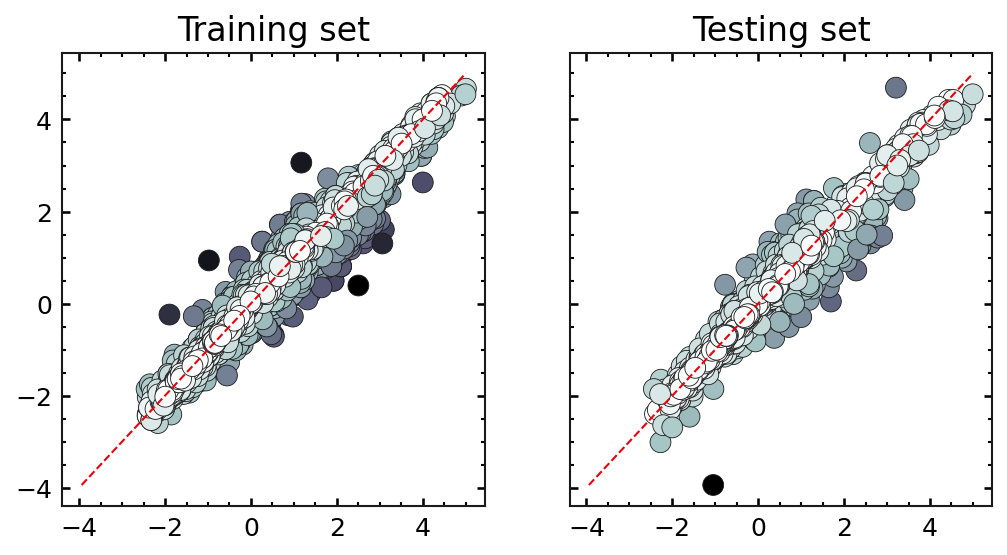

In [8]:
ridgecv = RidgeCV(cv=4,fit_intercept=False, alphas=alphas)
ridgecv.fit(X_train, y_train)
yp_test=ridgecv.predict(X_test)
yp_train=ridgecv.predict(X_train)
print('R^2 of training is ', ridgecv.score(X_train,y_train))
print('R^2 of testing is ', ridgecv.score(X_test,y_test))
print('Best regularization is ', ridgecv.alpha_)
fig, (ax_train, ax_test)=plt.subplots(1,2,figsize=(8,4), sharex=True, sharey=True)
ax_train.scatter(y_train, yp_train, c=np.abs(y_train - yp_train), cmap="bone_r", ec="k")
ax_test.scatter(y_test, yp_test, c=np.abs(y_test - yp_test), cmap="bone_r", ec="k")

bounds=(np.min((Y.min(), yp_train.min(), yp_test.min())), 
       np.max((Y.max(), yp_train.max(), yp_test.max()))
       )

ax_train.plot(bounds,bounds, 'r--')
ax_train.set_title('Training set')
ax_test.set_title('Testing set')
ax_test.plot(bounds,bounds, 'r--')


print("RMSE on predicted quantity = ", mean_squared_error(y_test, yp_test))


In [9]:
print("error in units (eV) of predicted quantity before scaling = ", (max(y_raw)-min(y_raw))*(1-ridgecv.score(X_test,y_test)))
print("error in units (eV) of predicted quantity after scaling= ", (max(Y)-min(Y))*(1-ridgecv.score(X_test,y_test)))

error in units (eV) of predicted quantity before scaling =  [ 0.29718497]
error in units (eV) of predicted quantity after scaling=  [ 0.23672795]


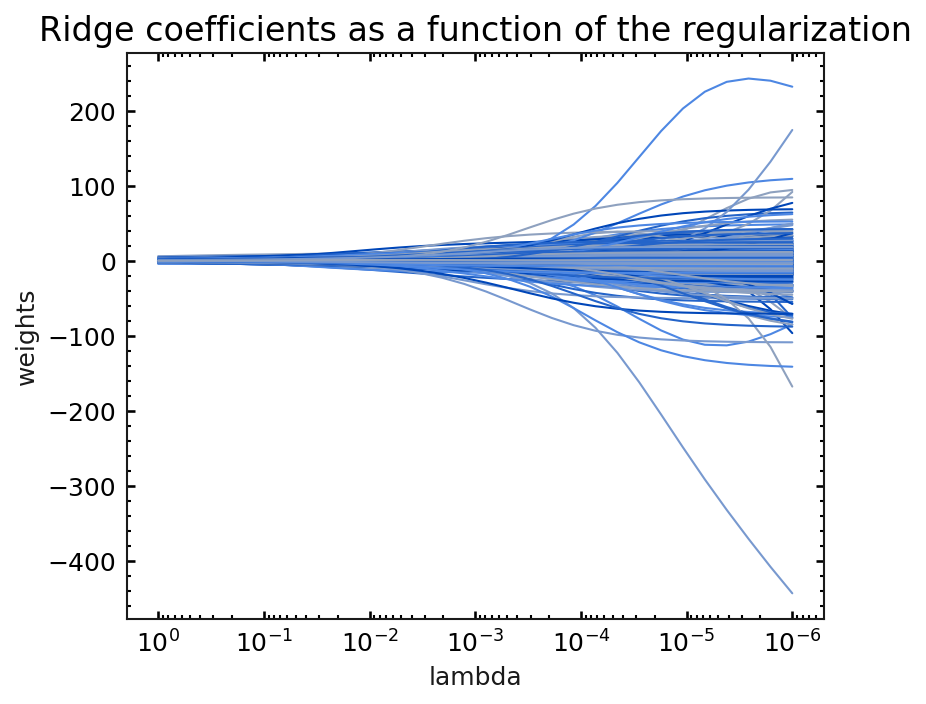

In [10]:
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a,fit_intercept=False)
    ridge.fit(X_train, y_train)
    Y_pred=ridge.predict(X_test)
#     print(ridge.score(X_test, Y_test))
    coefs.append(ridge.coef_.ravel())
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


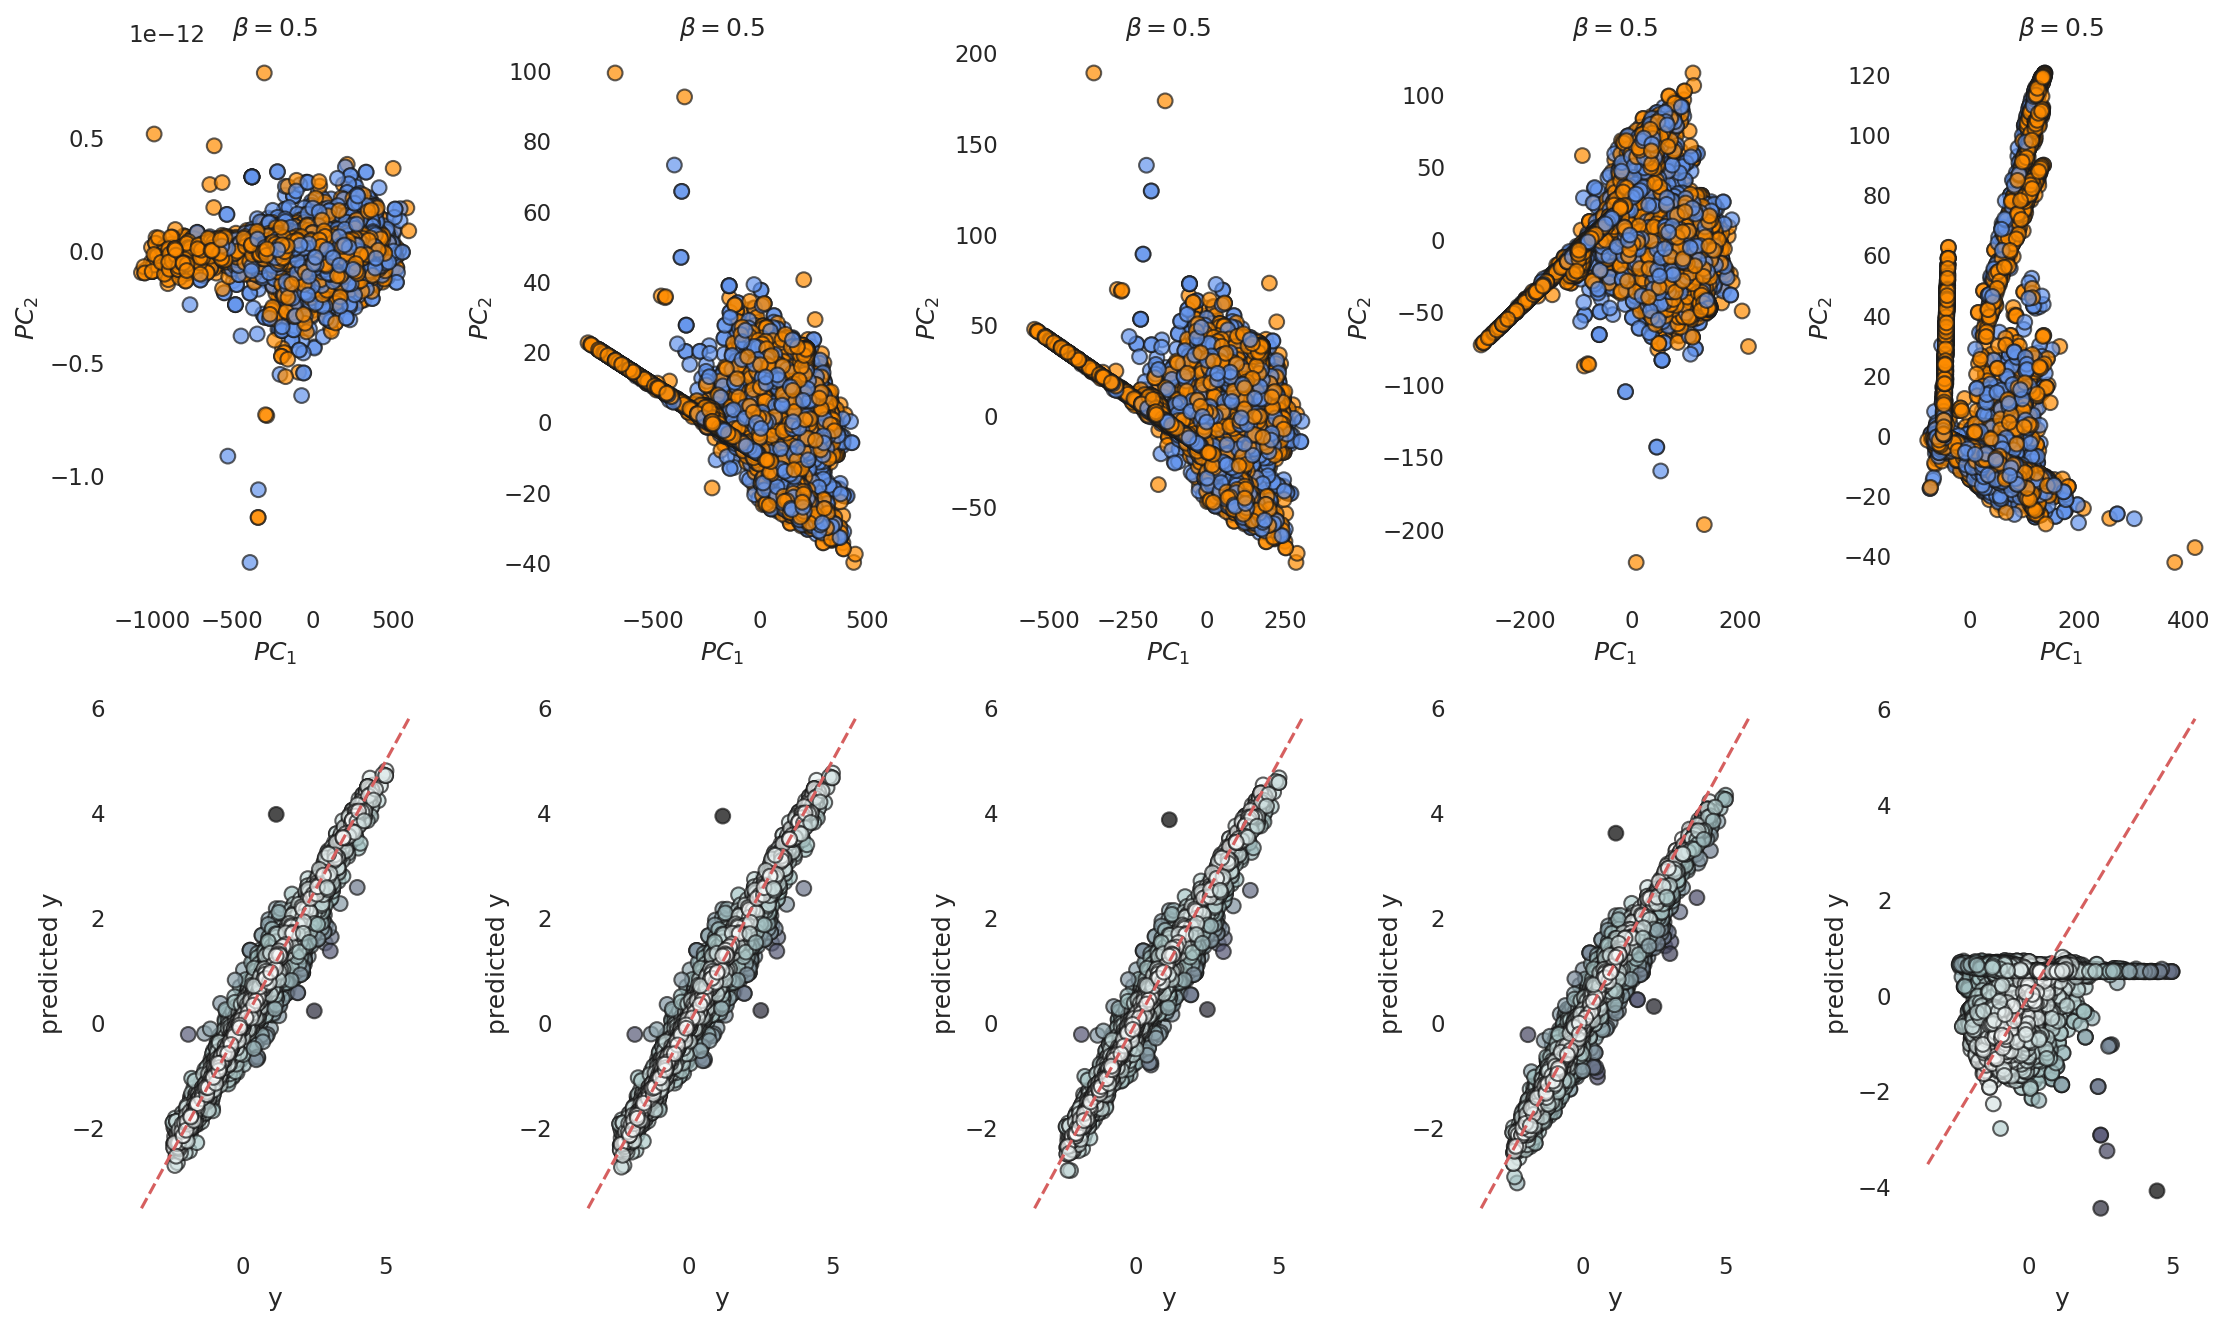

In [46]:
# n_plots = int(n_alphas ** 0.5)
# scale = 3

# t_ref = pcovr_calculators[0][-3].transform(X_test)
# y_ref = pcovr_calculators[0][-3].predict(X_test)
# x_ref = pcovr_calculators[0][-3].inverse_transform(tref)

# pfig, pax = plt.subplots(
#     n_plots,
#     int(np.ceil(n_alphas / n_plots)),
#     figsize=(
#         scale * int(np.ceil(n_alphas / n_plots)),
#         scale * n_plots,
#     ),
# )

# rfig, rax = plt.subplots(
#     n_plots,
#     int(np.ceil(n_alphas / n_plots)),
#     figsize=(
#         scale * int(np.ceil(n_alphas / n_plots)),
#         scale * n_plots,
#     ),
# )
betas=[0,0.25, 0.5, 0.75, 1]
sns.set(style="white", palette="muted", color_codes=True)
fig, axes = plt.subplots(2,5, figsize=(15,9))
sns.despine(left=True, bottom=True)

for i in range(len(betas)):
    
    pcovr = PCovR(mixing=betas[i],
              n_components=2)
    pcovr.fit(X,Y)
    T = pcovr.transform(X)
    yp = pcovr.predict(X)

    axes[0,i].scatter(T[:, 0], T[:, 1], s=50, alpha=0.7, c=y_atom, cmap = colors.ListedColormap(['cornflowerblue', 'darkorange']), edgecolor="k")
    axes[0,i].set_xlabel(r"$PC_1$")
    axes[0,i].set_ylabel(r"$PC_2$")


    axes[1,i].scatter(Y, yp, s=50, alpha=0.7, c=np.abs(Y - yp), cmap='bone_r', edgecolor="k")
    axes[1,i].plot(axy.get_xlim(), axy.get_xlim(), 'r--')
    axes[1,i].set_xlabel(r"y")
    axes[1,i].set_ylabel(r"predicted y")


    axes[0,i].set_title(r"$\beta=$" + str(mixing))
    fig.tight_layout()

#     print('R^2 = ', pcovr.score(X,Y))

#     t = pcovr.transform(X_test)
#     y = pcovr.predict(X_test)
#     x = pcovr.inverse_transform(t)

#     plot_projection(
#         Y_test, check_mirrors(t, t_ref), fig=pfig, ax=p, alpha=1.0, s=20, **cmaps
#     )

#     plot_regression(
#         Y_test[:, 0],
#         y[:, 0],
#         fig=pfig,
#         ax=r,
#         cbar=False,
#         vmin=0,
#         vmax=5,
#         alpha=1.0,
#         s=20,
#         **cmaps,
#     )

#     p.set_title(r"$\beta=$" + str(round(pcovr.mixing, 3)))
#     r.set_title(r"$\beta=$" + str(round(pcovr.mixing, 3)))


# for p, r in zip(pax.flatten()[n_alphas:], rax.flatten()[n_alphas:]):
#     p.axis("off")
#     r.axis("off")

# pfig.subplots_adjust(wspace=0.6, hspace=0.6)
# pfig.suptitle(r"Projections across $\beta$")
# rfig.subplots_adjust(wspace=0.6, hspace=0.6)
# rfig.suptitle(r"Regressions across $\beta$")

# plt.show()

In [11]:
mixing = 0.5
pcovr = PCovR(mixing=mixing,
              n_components=2)
pcovr.fit(X,Y)
T = pcovr.transform(X)
yp = pcovr.predict(X)

R^2 =  0.740819669876


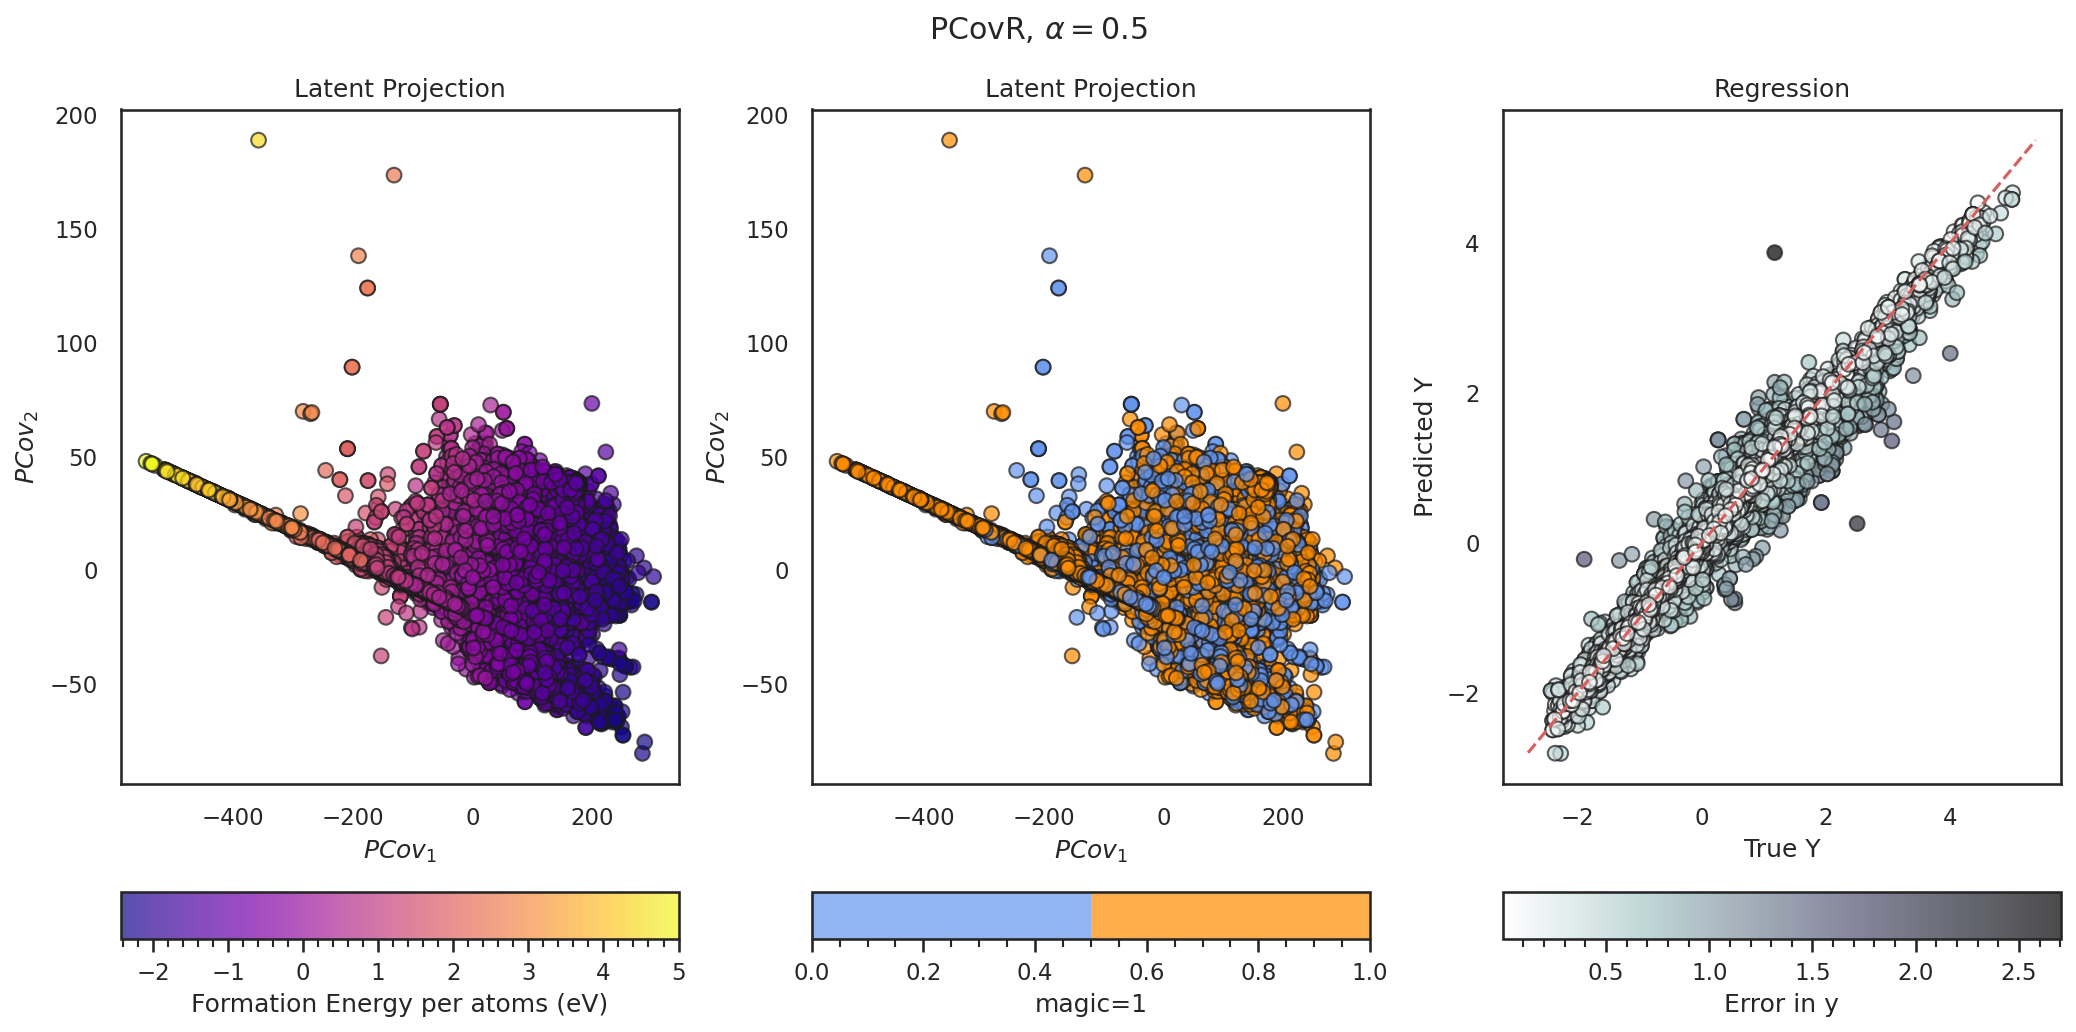

In [48]:
fig, ((axT, axM, axy), (caxT, caxM, caxy)) = plt.subplots(
    2, 3, figsize=(14, 7), gridspec_kw=dict(height_ratios=(1, 0.07))
)

scatT = axT.scatter(T[:, 0], T[:, 1], s=50, alpha=0.7, c=Y, cmap='plasma', edgecolor="k")
axT.set_xlabel(r"$PCov_1$")
axT.set_ylabel(r"$PCov_2$")
axT.set_title("Latent Projection")
fig.colorbar(scatT, cax=caxT, label="Formation Energy per atoms (eV)", orientation="horizontal")

scatM = axM.scatter(T[:, 0], T[:, 1], s=50, alpha=0.7, c=y_atom, cmap = colors.ListedColormap(['cornflowerblue', 'darkorange']), edgecolor="k")
axM.set_xlabel(r"$PCov_1$")
axM.set_ylabel(r"$PCov_2$")
axM.set_title("Latent Projection")
fig.colorbar(scatM, cax=caxM, label="magic=1", orientation="horizontal")

scaty = axy.scatter(Y, yp, s=50, alpha=0.7, c=np.abs(Y - yp), cmap='bone_r', edgecolor="k")
axy.plot(axy.get_xlim(), axy.get_xlim(), 'r--')
axy.set_xlabel(r"True Y")
axy.set_ylabel(r"Predicted Y")
axy.set_title("Regression")
fig.colorbar(scaty, cax=caxy,label='Error in y', orientation="horizontal")

fig.suptitle("PCovR, "+r"$\alpha=$" + str(mixing))
fig.tight_layout()

print('R^2 = ', pcovr.score(X,Y))

In [49]:
l=len(np.concatenate([frame.numbers for frame in my_frames]))

y_natoms=y_natoms.ravel()
y_atom=y_atom.ravel()
T_new=np.zeros((l,2))  
formE_new=np.zeros((l))  
magic_new =np.zeros((l))  
start=0
for j in range(len(y_natoms)):
    T_new[start:start+y_natoms[j], 0]=T[j,0]
    T_new[start:start+y_natoms[j], 1]=T[j,1]
    formE_new[start:start+y_natoms[j]]=Y[j]
    magic_new[start:start+y_natoms[j]]=y_atom[j]
    start+=y_natoms[j]


In [50]:
T_new.shape

(1401475, 2)

In [12]:
n_PC=2
data = write_input(
    # File to write 
    path="MP_relax_pcovr.json.gz",
    
    # Dataset name
    meta={"name": "MP PCovR"},
    
    # Structures in the dataset
    frames=my_frames,
    
    # projection of the dataset, and properties predictions
    properties={
        **{f"PCA_{i+1}": {"target": "structure", 
        "values": T[:, i]} for i in range(n_PC)},
        
#         "species": {
#             "target": "atom",
#             "values": np.concatenate([frame.numbers for frame in frames]),
#         },
#         "formation energies": {
#             "target": "atom",
#             "values": formE_new,
#         },
        "magic": {
            "target": "structure",
            "values": y_atom,
        },
    },
    
    # This should be the same cutoff used to generate the features
#     cutoff=3.5,
)

In [ ]:
mixing = 0.5
kpcovr = KPCovR(
    mixing=mixing,
    alpha=ridgecv.alpha_,
    kernel="rbf",
    gamma=0.1,
    n_components=2,
)
kpcovr.fit(X, Y)
Tk = kpcovr.transform(X)
ypk = y_scaler.inverse_transform(kpcovr.predict(X))


# Tk_new=np.zeros((l,2))  
 
# formEk_new=np.zeros((l))  
# start=0
# for j in range(len(y_natoms)):
# #     print(y_natoms[j])
#     Tk_new[start:start+y_natoms[j], 0]=Tk[j,0]
#     Tk_new[start:start+y_natoms[j], 1]=Tk[j,1]
#     formEk_new[start:start+y_natoms[j]]=ypk[j]
#     start+=y_natoms[j]
    

# fig, ((axT, axM, axy), (caxT, catM, caxy)) = plt.subplots(
#     2, 3, figsize=(14,7), gridspec_kw=dict(height_ratios=(1, 0.07))
# )

# scatT = axT.scatter(Tk[:, 0], Tk[:, 1], s=50, alpha=0.7, c=Y, cmap='plasma', edgecolor="k")
# axT.set_xlabel(r"$PCov_1$")
# axT.set_ylabel(r"$PCov_2$")
# axT.set_title("Latent Projection")
# fig.colorbar(scatT, cax=caxT, label="Formation Energy per atom (eV)", orientation="horizontal")

# scatM = axM.scatter(Tk[:, 0], Tk[:, 1], s=50, alpha=0.7, c=y_atom, cmap = colors.ListedColormap(['white', 'coral']), edgecolor="k")
# axM.set_xlabel(r"$PCov_1$")
# axM.set_ylabel(r"$PCov_2$")
# axM.set_title("Latent Projection")
# fig.colorbar(scatM, cax=caxM, label="magic=1", orientation="horizontal")

# scaty = axy.scatter(Y, yp, s=50, alpha=0.7, c=np.abs(Y - yp), cmap='bone_r', edgecolor="k")
# axy.plot(axy.get_xlim(), axy.get_xlim(), "r--")

# axy.set_xlabel(r"$y$")
# axy.set_ylabel(r"Predicted $y$")
# axy.set_title("Regression")
# fig.colorbar(scaty, cax=caxy, label='Error in y', orientation="horizontal")

# fig.suptitle("Kernel PCovR, "+r"$\alpha=$" + str(mixing))
# fig.tight_layout()

In [ ]:
df = pd.DataFrame(T, columns=['0', '1'])
df.head()

In [ ]:
n_PC=2
data = write_input(
    # File to write 
    path="MP_relax_kpcovr.json.gz",
    
    # Dataset name
    meta={"name": "MP KPCovR"},
    
    # Structures in the dataset
    frames=my_frames,
    
    # projection of the dataset, and properties predictions
    properties={
        **{f"PCA_{i+1}": {"target": "structure", 
        "values": Tk[:, i]} for i in range(n_PC)},

        "formation energies": {
            "target": "structure",
            "values": ypk,
        },
        "magic": {
            "target": "structure",
            "values": y_atom,
        },
    },
    
    
#     cutoff=3.5,
)